#Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datapath = '/content/drive/My Drive/'
df = pd.read_csv(datapath+'BankChurners.csv')

Mounted at /content/drive


#Cleaning the dataset

In [ ]:
df = df.drop(["CLIENTNUM",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
              "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"],axis=1)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


#Checking if there are any null in the dataset

In [ ]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# Just checking for the number of rows and columns

In [ ]:
df.shape

(10127, 20)

In [ ]:
df.head(1)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061


#Do different card types have an effect on the churning rates?

Mounted at /content/drive


<Figure size 1200x600 with 0 Axes>

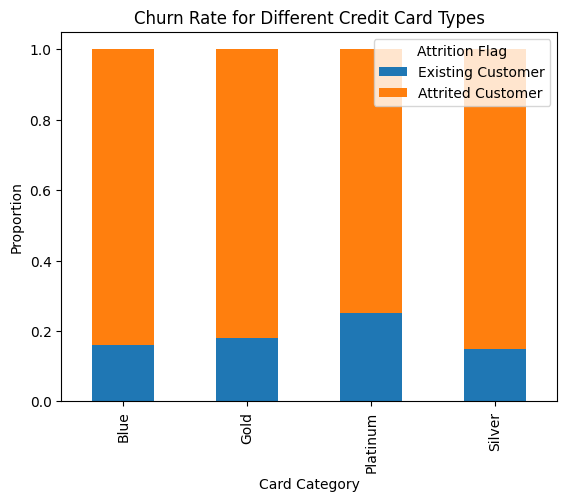

Chi-square test statistic: 2.2342
p-value: 0.5252
There is no significant association between the Card Category and Attrition .


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
#loading it into our harddrive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datapath = '/content/drive/My Drive/'
df = pd.read_csv(datapath+'BankChurners.csv')

#Just making attrition and the card category into categorical variiable
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
df['Card_Category'] = df['Card_Category'].astype('category')

# This is just to plot the the churn rates for different credit card types
plt.figure(figsize=(12, 6))
card_churn = df.groupby('Card_Category')['Attrition_Flag'].value_counts(normalize=True).unstack().fillna(0)
card_churn.plot(kind='bar', stacked=True)
plt.title('Churn Rate for Different Credit Card Types')
plt.xlabel('Card Category')
plt.ylabel('Proportion')
plt.legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

#the chi-square test
contingency_table = pd.crosstab(df['Card_Category'], df['Attrition_Flag'])
chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f'Chi-square test statistic: {chi2:.4f}')
print(f'p-value: {p:.4f}')

# Interpret the results(notdone)
if p <= 0.05:
    print("There is a significant association between the Card Category and Attrition .")
else:
    print("There is no significant association between the Card Category and Attrition .")

#Are customers with higher months on book less likely to churn?







Mounted at /content/drive


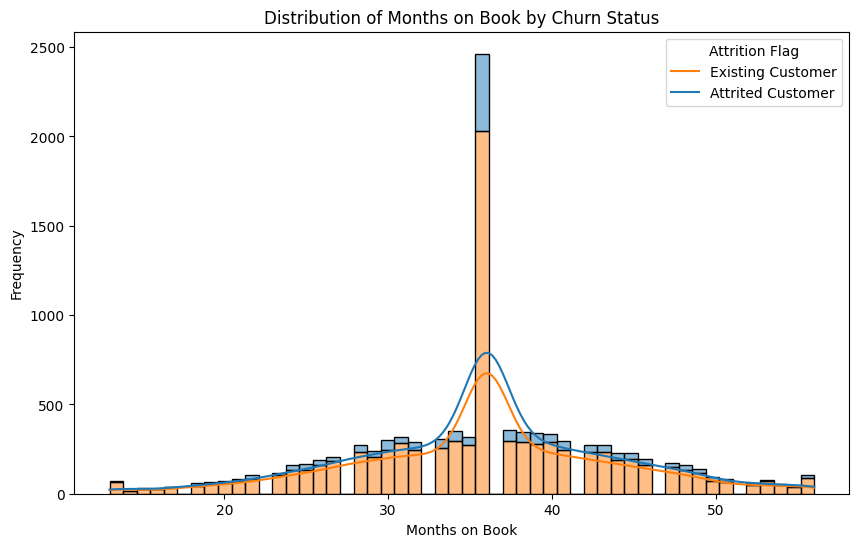

T-test statistic: 1.4042
p-value: 0.1604
There is no statistically significant difference in the mean months between churned and non-churned customers.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
#Just loading data
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datapath = '/content/drive/My Drive/'
df = pd.read_csv(datapath+'BankChurners.csv')

df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')

# This is the plot for churned and non churned customer
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Months_on_book', hue='Attrition_Flag', kde=True, multiple="stack")
plt.title('Distribution of Months on Book by Churn Status')
plt.xlabel('Months on Book')
plt.ylabel('Frequency')
plt.legend(title='Attrition Flag', labels=['Existing Customer', 'Attrited Customer'])
plt.show()

# this is just to seperate the churned and nonchurned
churned = df[df['Attrition_Flag'] == 'Attrited Customer']['Months_on_book']
not_churned = df[df['Attrition_Flag'] == 'Existing Customer']['Months_on_book']

# This is to conduct the t-test to compare the means of months on book
t_stat, p_val = ttest_ind(churned, not_churned, equal_var=False)
print(f'T-test statistic: {t_stat:.4f}')
print(f'p-value: {p_val:.4f}')

# This is the results
if p_val < 0.05:
    print('There is a statistically significant difference in the mean months between churned and non-churned customers.')
else:
    print('There is no statistically significant difference in the mean months between churned and non-churned customers.')


#Do certain households (marriage status, number of dependents, income level) have higher churn rates?


In [ ]:
df_household = df[['Attrition_Flag', 'Dependent_count', 'Marital_Status', 'Income_Category']].copy()

# This is just to categorize the count
def dependents_category(num):
    if num == 0:
        return '0'
    elif num > 3:
        return '3+'
    else:
        return '1-3'

# the function to make the "Dependents" column and drop the "Dependent_Count"
df_household['Dependents'] = df_household['Dependent_count'].apply(dependents_category)
df_household.drop('Dependent_count', axis=1, inplace=True)

# Filtering for attrited customers and droping the Attrition_Flag column
household_attrited = df_household[df_household['Attrition_Flag'] == 'Attrited Customer'].copy()
household_attrited.drop('Attrition_Flag', axis=1, inplace=True)

# Grouping by columns and counts for different demographic combinations
columns_group = ['Marital_Status', 'Income_Category', 'Dependents']
household_combo_count = household_attrited.groupby(columns_group).size().reset_index(name='Churn_Count')

# Calculating the total number of attrited customers
total_attrited_count = household_combo_count['Churn_Count'].sum()

# Calculating the churn rate for each household demographic combination
household_combo_count['Churn_Rate'] = household_combo_count['Churn_Count'] / total_attrited_count

# Sorting by churn rate in descending order
household_combo_count = household_combo_count.sort_values(by='Churn_Rate', ascending=False, ignore_index=True)

print(household_combo_count)

   Marital_Status Income_Category Dependents  Churn_Count  Churn_Rate
0          Single  Less than $40K        1-3          186    0.114321
1         Married  Less than $40K        1-3          180    0.110633
2         Married     $40K - $60K        1-3           95    0.058390
3         Married    $80K - $120K        1-3           74    0.045482
4          Single     $40K - $60K        1-3           71    0.043639
..            ...             ...        ...          ...         ...
63        Married         $120K +          0            2    0.001229
64        Unknown     $60K - $80K          0            1    0.000615
65       Divorced         Unknown          0            1    0.000615
66        Unknown         Unknown          0            1    0.000615
67       Divorced     $40K - $60K          0            1    0.000615

[68 rows x 5 columns]


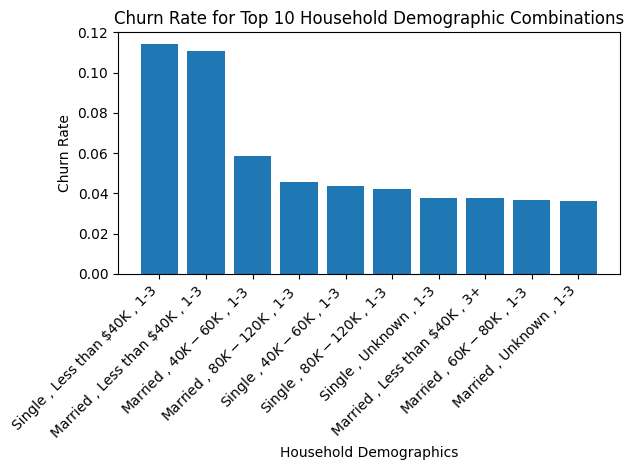

In [ ]:
# Just getting the first 10 rows
top_10_combinations = household_combo_count.head(10)

# Graphing the results
plt.figure()
plt.bar(range(len(top_10_combinations)), top_10_combinations['Churn_Rate'])
plt.xticks(range(len(top_10_combinations)), top_10_combinations['Marital_Status'] + ' , ' + top_10_combinations['Income_Category'] + ' , ' + top_10_combinations['Dependents'], rotation=45, ha='right')
plt.xlabel('Household Demographics')
plt.ylabel('Churn Rate')
plt.title('Churn Rate for Top 10 Household Demographic Combinations')
plt.tight_layout()
plt.show()

#Do age, gender and education affect the credit card churning rate?

Mounted at /content/drive


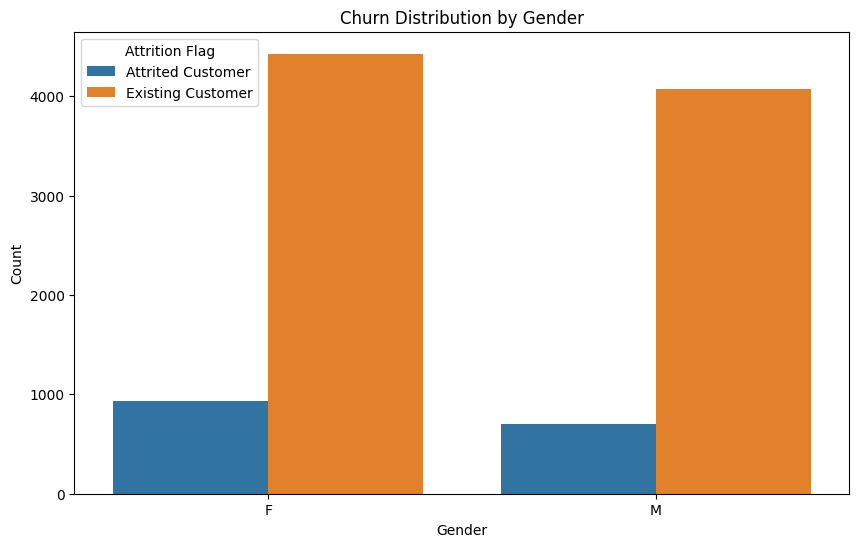

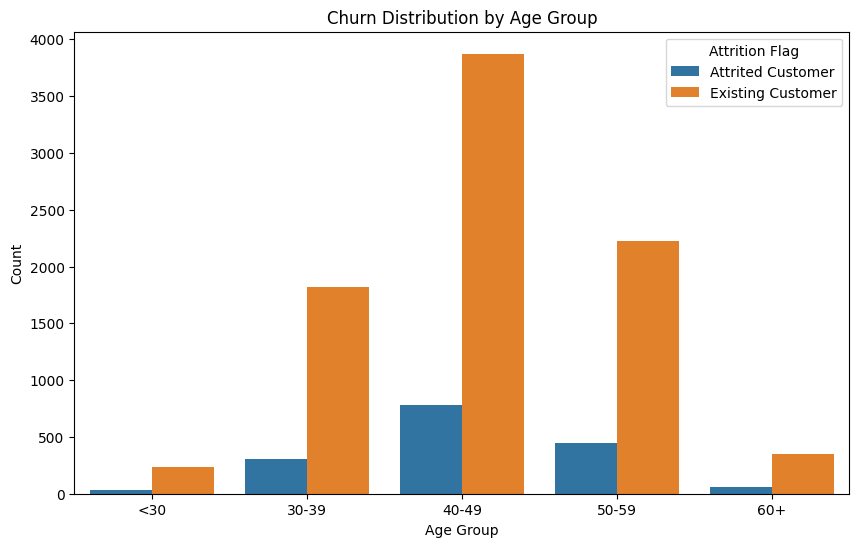

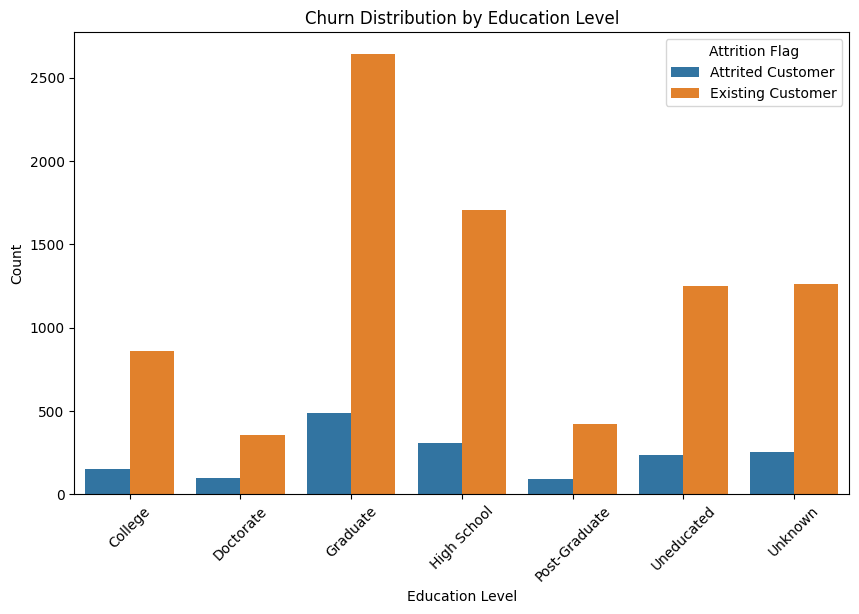

Gender - Chi-square test statistic: 13.8656, p-value: 0.0002
Age Group - Chi-square test statistic: 10.2721, p-value: 0.0361
Education Level - Chi-square test statistic: 12.5112, p-value: 0.0515


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency, ttest_ind

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datapath = '/content/drive/My Drive/'
df = pd.read_csv(datapath+'BankChurners.csv')

# This turns the necessary columns into categorical types
df['Attrition_Flag'] = df['Attrition_Flag'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Education_Level'] = df['Education_Level'].astype('category')
df['Income_Category'] = df['Income_Category'].astype('category')

# Creates the age group column
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-39', '40-49', '50-59', '60+'])

# The plot that shows the distribution of churn by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Gender', hue='Attrition_Flag')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.show()

# The plot that shows the distribution of churn by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group', hue='Attrition_Flag')
plt.title('Churn Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.show()

# The plot that shows the distribution of churn by education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Education_Level', hue='Attrition_Flag')
plt.title('Churn Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Attrition Flag')
plt.xticks(rotation=45)
plt.show()


# The chi square test, gender
contingency_table_gender = pd.crosstab(df['Gender'], df['Attrition_Flag'])
chi2_gender, p_gender, dof_gender, ex_gender = chi2_contingency(contingency_table_gender)
print(f'Gender - Chi-square test statistic: {chi2_gender:.4f}, p-value: {p_gender:.4f}')

#The chi square test, age group
contingency_table_age = pd.crosstab(df['Age_Group'], df['Attrition_Flag'])
chi2_age, p_age, dof_age, ex_age = chi2_contingency(contingency_table_age)
print(f'Age Group - Chi-square test statistic: {chi2_age:.4f}, p-value: {p_age:.4f}')

# The chi square test, eductional level
contingency_table_education = pd.crosstab(df['Education_Level'], df['Attrition_Flag'])
chi2_education, p_education, dof_education, ex_education = chi2_contingency(contingency_table_education)
print(f'Education Level - Chi-square test statistic: {chi2_education:.4f}, p-value: {p_education:.4f}')




# Does a higher credit limit correlate to a higher transaction count?

Mounted at /content/drive


<ipython-input-11-f904fc4bdd97>:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  scatter_plot = sns.scatterplot(data=df_subset, x='Credit_Limit', y='Total_Trans_Ct', alpha=0.6, s=80, edgecolor='w', palette='viridis')


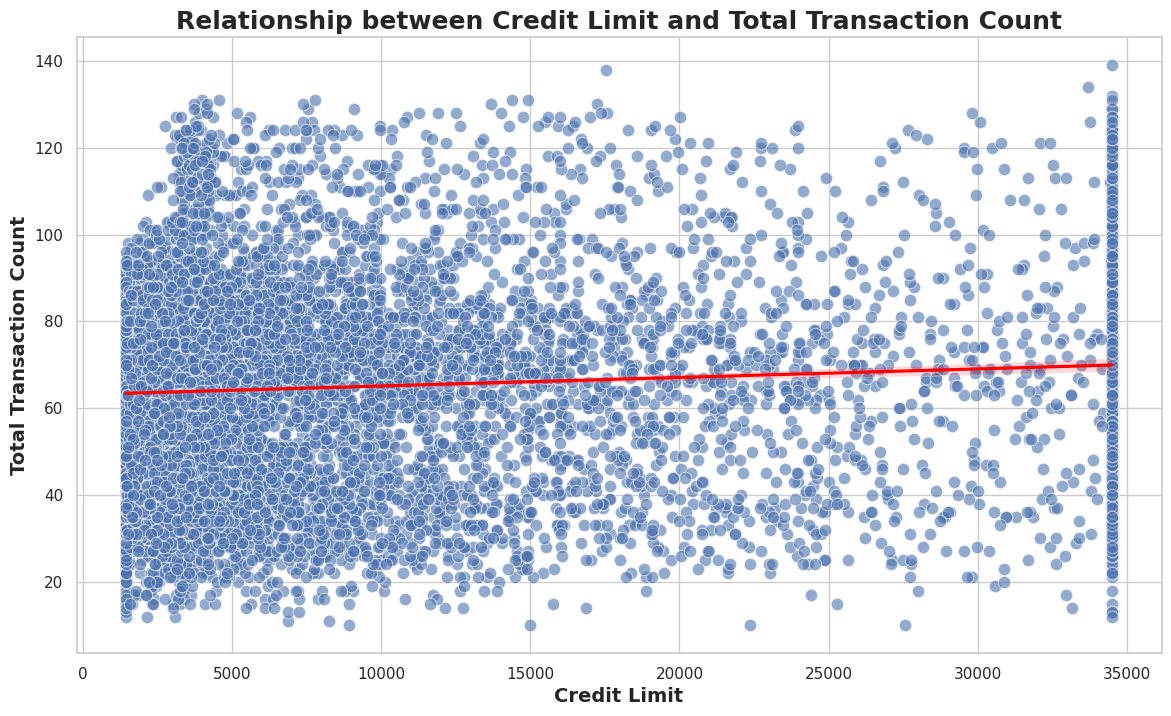

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datapath = '/content/drive/My Drive/'
df = pd.read_csv(datapath+'BankChurners.csv')


df_subset = df[['Credit_Limit', 'Total_Trans_Ct']]

# Style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(data=df_subset, x='Credit_Limit', y='Total_Trans_Ct', alpha=0.6, s=80, edgecolor='w', palette='viridis')
sns.regplot(data=df_subset, x='Credit_Limit', y='Total_Trans_Ct', scatter=False, color='red', line_kws={'label': 'Trend line'})

# Customize the plot with titles and labels
plt.title('Relationship between Credit Limit and Total Transaction Count', fontsize=18, weight='bold')
plt.xlabel('Credit Limit', fontsize=14, weight='bold')
plt.ylabel('Total Transaction Count', fontsize=14, weight='bold')

plt.show()

# Data Model

In [ ]:
# Import statsmodel
import statsmodels.formula.api as smf

# Create a copy of dataframe to use for model
df_model = df.copy()

# Replace the values of the Attrition_Flag column with 1 for attrited customers and 0 for existing customers
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [ ]:
# Define the formula
form = 'Attrition_Flag ~ Customer_Age + Gender + Dependent_count + Education_Level + Marital_Status + Income_Category + Card_Category + Months_on_book + Credit_Limit + Total_Trans_Amt + Total_Trans_Ct'

# Fit the logistic regression model
model = smf.logit(formula=form, data=df_model)
results = model.fit()

# Print the summary of the model
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.326278
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:         Attrition_Flag   No. Observations:                10127
Model:                          Logit   Df Residuals:                    10102
Method:                           MLE   Df Model:                           24
Date:                Fri, 24 May 2024   Pseudo R-squ.:                  0.2597
Time:                        16:52:24   Log-Likelihood:                -3304.2
converged:                       True   LL-Null:                       -4463.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             3.8579      0.340     11

In [ ]:
res_sm = pd.DataFrame(results.params, columns= ["coefs_sm"])

res_sm["odds_sm"] = np.exp(res_sm["coefs_sm"])

print(res_sm.round(3))

                                   coefs_sm  odds_sm
Intercept                             3.858   47.365
Gender[T.M]                          -0.759    0.468
Education_Level[T.Doctorate]          0.383    1.467
Education_Level[T.Graduate]          -0.064    0.938
Education_Level[T.High School]       -0.093    0.911
Education_Level[T.Post-Graduate]      0.191    1.211
Education_Level[T.Uneducated]         0.006    1.006
Education_Level[T.Unknown]            0.064    1.066
Marital_Status[T.Married]            -0.543    0.581
Marital_Status[T.Single]              0.183    1.201
Marital_Status[T.Unknown]             0.053    1.054
Income_Category[T.$40K - $60K]       -0.715    0.489
Income_Category[T.$60K - $80K]       -0.571    0.565
Income_Category[T.$80K - $120K]      -0.303    0.739
Income_Category[T.Less than $40K]    -0.648    0.523
Income_Category[T.Unknown]           -0.559    0.572
Card_Category[T.Gold]                 0.929    2.532
Card_Category[T.Platinum]             1.444   